#### KNMI WIND netCDF-4 data plot

In [12]:
import numpy as np
import xarray as xr 
import pandas as pd
import matplotlib.pyplot as plt
import cmocean as cmo
import cartopy.crs as ccrs
import cartopy.feature as cfeature


In [17]:
### Plot definitions

land_resolution = '10m'
land_poly = cfeature.NaturalEarthFeature('physical', 'land', land_resolution,
                                        edgecolor='k',
                                        facecolor=cfeature.COLORS['land'])

In [18]:
''' Building Dataset'''

wind_d = xr.open_mfdataset('/home/bruno/git/CMEMS/wind_data/*.nc') #serie cmems monthly composite

wind_data = wind_d.reindex()

wind_d.close()
# wind_data.attrs
# wind_data.var

In [19]:
print(wind_data.time)

<xarray.DataArray 'time' (time: 4373)>
array([cftime.DatetimeGregorian(2007, 1, 1, 0, 0, 0, 0),
       cftime.DatetimeGregorian(2007, 1, 2, 0, 0, 0, 0),
       cftime.DatetimeGregorian(2007, 1, 3, 0, 0, 0, 0), ...,
       cftime.DatetimeGregorian(2018, 12, 29, 0, 0, 0, 0),
       cftime.DatetimeGregorian(2018, 12, 30, 0, 0, 0, 0),
       cftime.DatetimeGregorian(2018, 12, 31, 0, 0, 0, 0)], dtype=object)
Coordinates:
  * time     (time) object 2007-01-01 00:00:00 ... 2018-12-31 00:00:00
Attributes:
    standard_name:        time
    long_name:            Validity time
    axis:                 T
    _ChunkSizes:          1
    _CoordinateAxisType:  Time


In [20]:
#definindo variavéis a partir do arquivo

lat = wind_data.lat
lon = wind_data.lon

v_s = wind_data.northward_wind.groupby("time.season").mean()

u_s= wind_data.eastward_wind.groupby("time.season").mean()

speed_s = wind_data.wind_speed.groupby("time.season").mean()

wind_stress_magnitude = wind_data.wind_stress_magnitude.groupby("time.season").mean()

#wind_stress_curl = wind_data.wind_stress_curl.groupby("time.season").mean()

wind_data.close()

/home/bruno/anaconda2/envs/ocean/lib/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/bruno/anaconda2/envs/ocean/lib/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/bruno/anaconda2/envs/ocean/lib/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/bruno/anaconda2/envs/ocean/lib/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/bruno/anaconda2/envs/ocean/lib/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/bruno/anaconda2/envs/ocean/lib/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: in

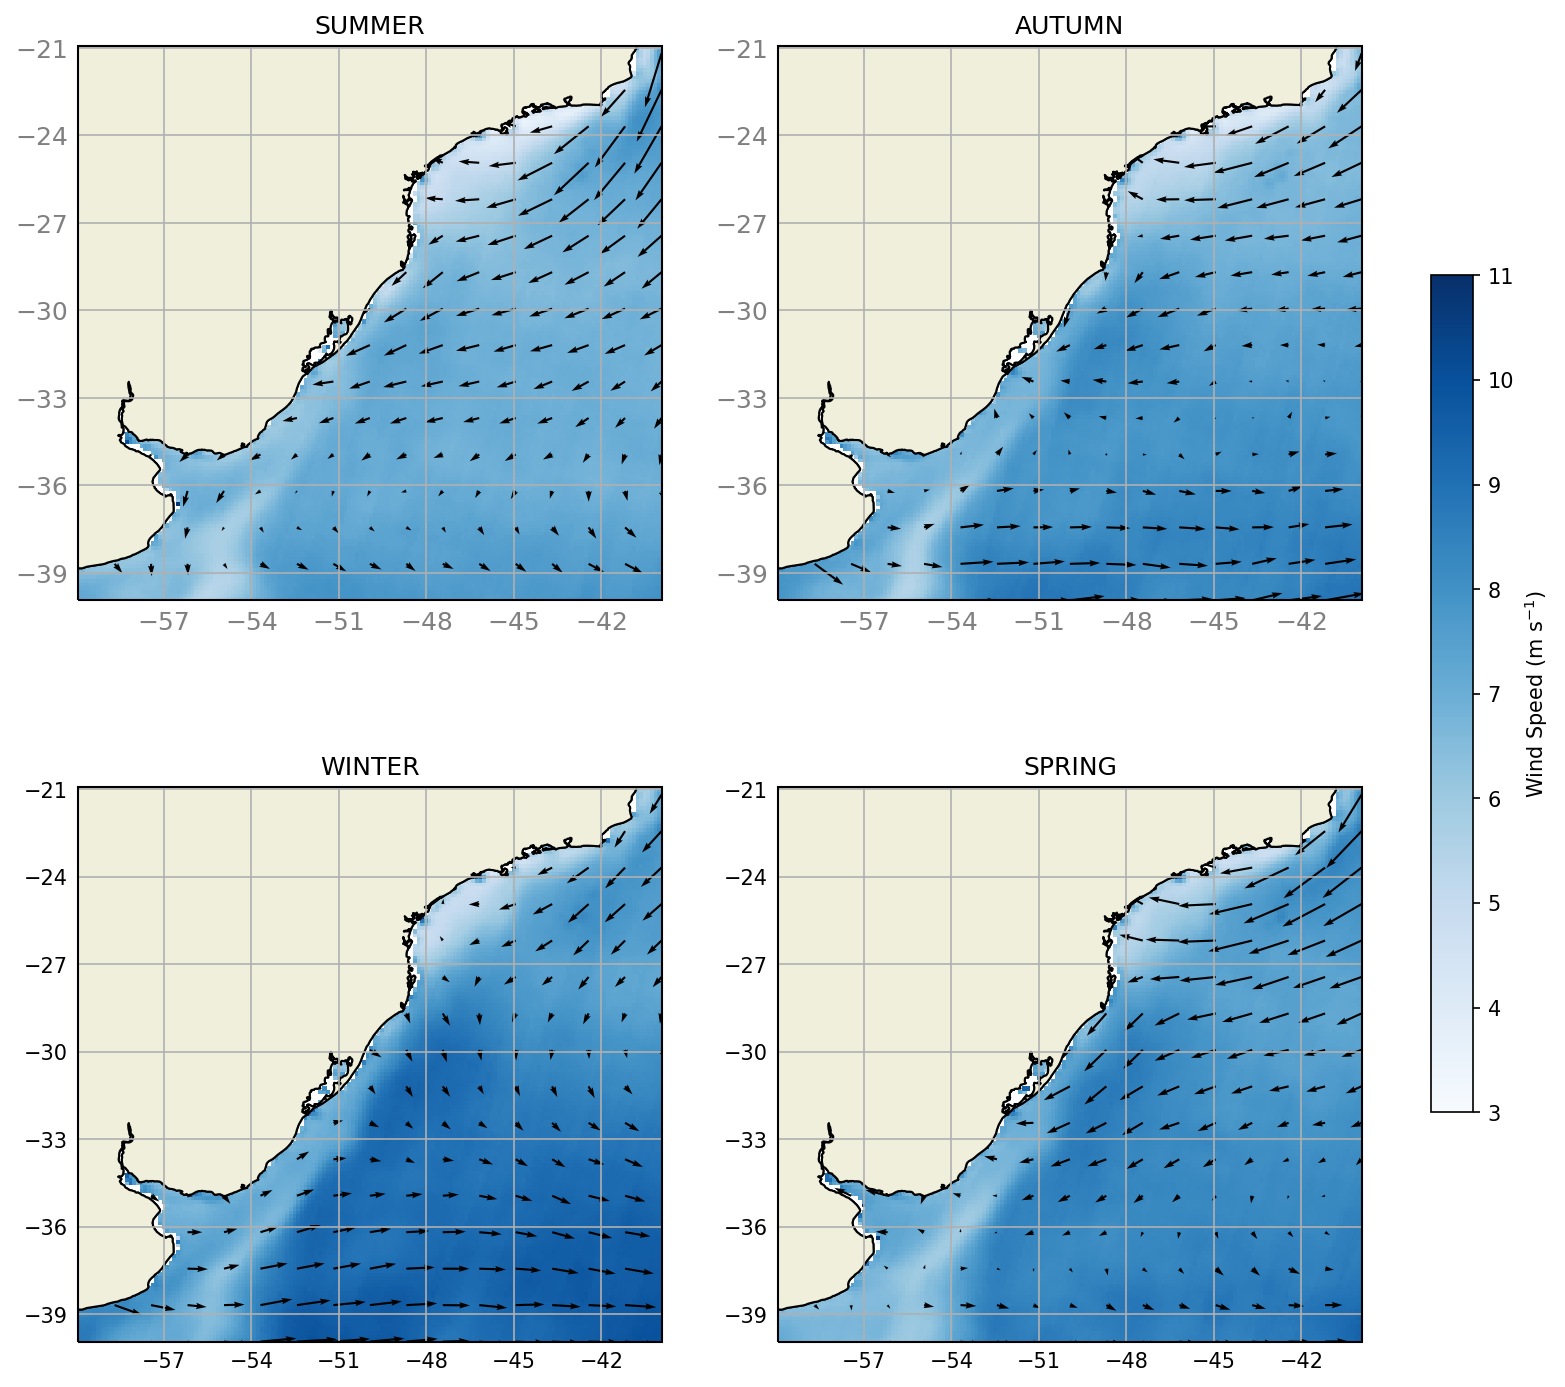

In [32]:
from matplotlib import gridspec

### CARTOPY SUBPLOT ####

#%%capture

fig1 = plt.figure(figsize=(12, 12), dpi=150)

gs  = gridspec.GridSpec(2, 2)

v = 10

# SUMMER - DJF

ax = plt.subplot(gs[0,0], projection=ccrs.PlateCarree(central_longitude=0.0))
wind_summer = plt.pcolor(lon, lat, speed_s.sel(season='DJF'), vmin = 3, vmax=11, cmap='Blues')
ax.coastlines(resolution=land_resolution, color='black', linewidth=1)
ax.add_feature(land_poly)
g = ax.gridlines(draw_labels=True)
g.xlabels_top= False
g.ylabels_right = False
g.xlabel_style = {'size': 12, 'color': 'gray'}
g.ylabel_style = {'size': 12, 'color': 'gray'}
plt.quiver(lon.values[::v],lat.values[::v], u_s.sel(season='DJF').values[::v,::v], v_s.sel(season='DJF').values[::v,::v])
#cbar=plt.colorbar(wind_summer,ticks=np.linspace(0,15,15),format='%i',aspect=50,pad=0.1)
#cbar.set_label(r'Wind Speed (m s$^{-1}$)')

plt.title('SUMMER')

# AUTUMN - MAM

ax1 = plt.subplot(gs[0,1], projection=ccrs.PlateCarree(central_longitude=0.0))
wind_autumn = plt.pcolor(lon, lat, speed_s.sel(season='MAM'), vmin = 3, vmax=11, cmap='Blues')
ax1.coastlines(resolution=land_resolution, color='black', linewidth=1)
ax1.add_feature(land_poly)
g1 = ax1.gridlines(draw_labels=True)
g1.xlabels_top= False
g1.ylabels_right = False
g1.xlabel_style = {'size': 12, 'color': 'gray'}
g1.ylabel_style = {'size': 12, 'color': 'gray'}
plt.quiver(lon.values[::v],lat.values[::v], u_s.sel(season='MAM').values[::v,::v] , v_s.sel(season='MAM').values[::v,::v])
#cbar=plt.colorbar(wind_autumn,format='%i',aspect=50,pad=0.1)
#cbar.set_label(r'Wind Speed (m s$^{-1}$)')
plt.title('AUTUMN')

### WINTER - JJA ####

ax2 = plt.subplot(gs[1,0], projection=ccrs.PlateCarree(central_longitude=0.0))
wind_winter = plt.pcolor(lon, lat, speed_s.sel(season='JJA'), vmin = 3, vmax=11, cmap='Blues')
ax2.coastlines(resolution=land_resolution, color='black', linewidth=1)
ax2.add_feature(land_poly)
g2 = ax2.gridlines(draw_labels=True)
g2.xlabels_top= False
g2.ylabels_right = False
plt.quiver(lon.values[::v],lat.values[::v], u_s.sel(season='JJA').values[::v,::v] , v_s.sel(season='JJA').values[::v,::v])
#cbar=plt.colorbar(wind_winter,format='%i',aspect=50,pad=0.1)
#cbar.set_label(r'Wind Speed (m s$^{-1}$)')
plt.title('WINTER')

### Figure SPRING - SON ####

ax3 = plt.subplot(gs[1,1],projection=ccrs.PlateCarree(central_longitude=0.0))
wind_spring = plt.pcolor(lon, lat, speed_s.sel(season='SON'), vmin = 3, vmax=11, cmap='Blues')
ax3.coastlines(resolution=land_resolution, color='black', linewidth=1)
ax3.add_feature(land_poly)
g3 = ax3.gridlines(draw_labels=True)
g3.xlabels_top= False
g3.ylabels_right = False
plt.quiver(lon.values[::v],lat.values[::v], u_s.sel(season='SON').values[::v,::v] , v_s.sel(season='SON').values[::v,::v])
#cbar=plt.colorbar(wind_spring,format='%i',aspect=50,pad=0.1)
#cbar.set_label(r'Wind Speed (m s$^{-1}$)')
plt.title('SPRING')

cbar = fig1.colorbar(wind_summer, ax=[ax, ax1, ax2, ax3], fraction=0.03)
cbar.set_label(r'Wind Speed (m s$^{-1}$)')
plt.show()